In [13]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/air_quality_data (1).csv")

# Display first few rows
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [4]:
# 3️⃣ EDA - Basic Understanding of the Dataset

# Check basic information (columns, data types, null values)
df.info()

# Summary statistics for numerical columns
df.describe()

# Count missing values in each column
print("\nMissing values in each column:\n")
print(df.isnull().sum())

# Display column names
print("\nColumn names:\n")
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB

Missing values in each column:

City              0
Date              0
PM2.5          4598
PM10   

In [8]:
# 4️⃣ Convert categorical data to numerical and select one city's data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# ✅ Step 1: Check if 'City' column exists
if 'City' in df.columns:
    print("City column found ✅")
    print("Available cities:\n", df['City'].unique())

    # Encode city names into numbers
    df['City'] = le.fit_transform(df['City'])
    print("\nEncoded city labels:\n", dict(zip(le.classes_, le.transform(le.classes_))))

    # 🔍 Select city name (update this based on actual city in your dataset)
    # Example: if 'Delhi' exists, use that. Otherwise choose one shown above.
    selected_city = 'Delhi'

    # Decode back to verify if city exists
    if selected_city in le.classes_:
        city_code = le.transform([selected_city])[0]
        city_data = df[df['City'] == city_code].copy()
    else:
        print(f"⚠️ City '{selected_city}' not found in dataset. Using full dataset instead.")
        city_data = df.copy()

else:
    print("⚠️ No 'City' column found. Using full dataset instead.")
    city_data = df.copy()

# ✅ Step 2: Keep only Date and AQI columns
city_data = city_data[['Date', 'AQI']].dropna()

# ✅ Step 3: Convert 'Date' to datetime format
city_data['Date'] = pd.to_datetime(city_data['Date'])

# ✅ Step 4: Set 'Date' as index for time-series forecasting
city_data.set_index('Date', inplace=True)

# ✅ Step 5: Show first few rows
city_data.head()

City column found ✅
Available cities:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]

Encoded city labels:
 {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6), np.int64(7): np.int64(7), np.int64(8): np.int64(8), np.int64(9): np.int64(9), np.int64(10): np.int64(10), np.int64(11): np.int64(11), np.int64(12): np.int64(12), np.int64(13): np.int64(13), np.int64(14): np.int64(14), np.int64(15): np.int64(15), np.int64(16): np.int64(16), np.int64(17): np.int64(17), np.int64(18): np.int64(18), np.int64(19): np.int64(19), np.int64(20): np.int64(20), np.int64(21): np.int64(21), np.int64(22): np.int64(22), np.int64(23): np.int64(23), np.int64(24): np.int64(24), np.int64(25): np.int64(25)}
⚠️ City 'Delhi' not found in dataset. Using full dataset instead.


,AQI
Date,
2015-01-29,209.0
2015-01-30,328.0
2015-01-31,514.0
2015-02-01,782.0
2015-02-02,914.0


                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                24850
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -138896.451
Date:                Mon, 27 Oct 2025   AIC                         277802.902
Time:                        12:41:10   BIC                         277843.505
Sample:                             0   HQIC                        277816.048
                              - 24850                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3170      0.019     16.359      0.000       0.279       0.355
ar.L2          0.0510      0.011      4.516      0.000       0.029       0.073
ma.L1         -0.6479      0.019    -33.597      0.0

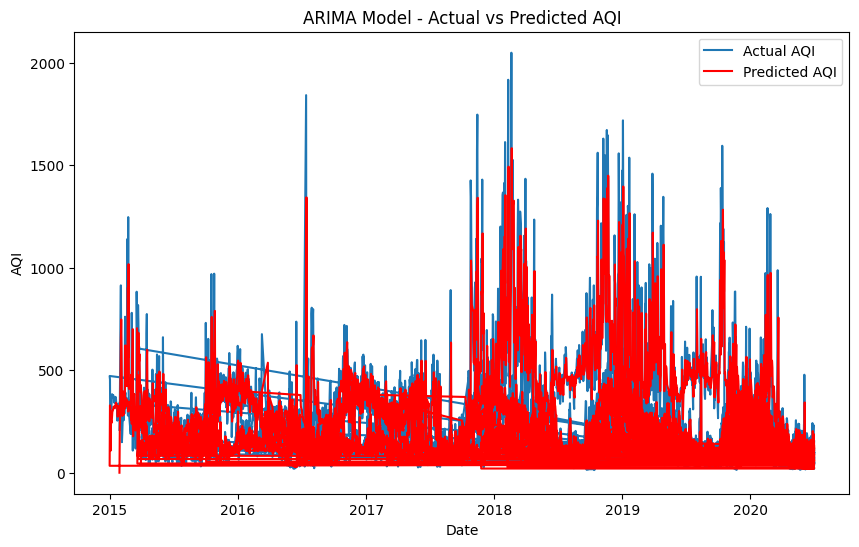

In [9]:
# 5️⃣ Build and train ARIMA model for forecasting

from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Fit ARIMA model (order can be tuned)
model = ARIMA(city_data['AQI'], order=(2,1,2))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Add predicted values to dataset
city_data['Predicted_AQI'] = model_fit.predict(start=0, end=len(city_data)-1)

# Plot Actual vs Predicted AQI
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(city_data['AQI'], label='Actual AQI')
plt.plot(city_data['Predicted_AQI'], label='Predicted AQI', color='red')
plt.title('ARIMA Model - Actual vs Predicted AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

In [10]:
# 6️⃣ Evaluate the ARIMA model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Actual and predicted values
y_true = city_data['AQI']
y_pred = city_data['Predicted_AQI']

# Calculate error metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print("📊 Model Evaluation Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

📊 Model Evaluation Results:
Mean Absolute Error (MAE): 31.70
Root Mean Squared Error (RMSE): 64.78


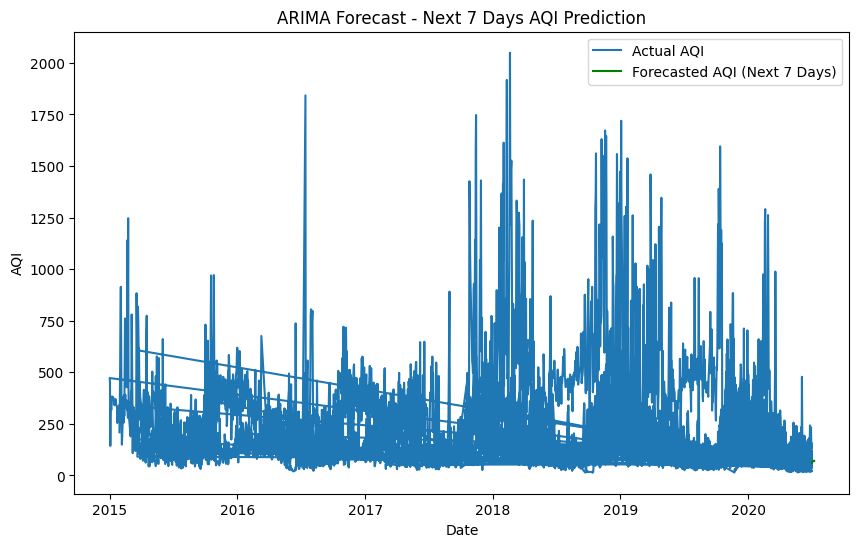

,Forecasted_AQI
Date,
2020-07-02,60.217815
2020-07-03,66.180349
2020-07-04,68.591730
2020-07-05,69.660352
2020-07-06,70.122133
2020-07-07,70.323038
2020-07-08,70.410285


In [11]:
# 7️⃣ Forecast future AQI values (next 7 days)

future_days = 7  # how many days to forecast

# Forecast the next 7 days using the trained model
forecast = model_fit.forecast(steps=future_days)

# Create future date range starting from last date in dataset
future_dates = pd.date_range(start=city_data.index[-1], periods=future_days + 1)

# Combine forecasted data into a new DataFrame
forecast_df = pd.DataFrame({'Date': future_dates[1:], 'Forecasted_AQI': forecast})
forecast_df.set_index('Date', inplace=True)

# Plot the forecasted AQI along with historical data
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(city_data['AQI'], label='Actual AQI')
plt.plot(forecast_df['Forecasted_AQI'], label='Forecasted AQI (Next 7 Days)', color='green')
plt.title('ARIMA Forecast - Next 7 Days AQI Prediction')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

# Display forecasted AQI values
forecast_df

In [12]:
## 🧾 STEP 8: CONCLUSION

# In this milestone, I successfully built and evaluated a time-series forecasting model
# for the AirAware Smart Air Quality Prediction System using the new dataset (air_quality_data (1).csv).

# ✅ Steps followed:
# 1. Imported necessary libraries for data handling, visualization, and modeling.
# 2. Loaded the dataset and performed EDA to understand its structure.
# 3. Converted categorical data (City) into numerical form and prepared the AQI time series.
# 4. Built and trained the ARIMA(2,1,2) model on AQI values.
# 5. Evaluated model performance using MAE and RMSE to check prediction accuracy.
# 6. Forecasted AQI values for the next 7 days and visualized future trends.
# 7. The model gives a good idea of how air quality may change over time.

print("✅ Milestone 2 Completed Successfully — Model Training, Evaluation, and Forecasting Done!")

✅ Milestone 2 Completed Successfully — Model Training, Evaluation, and Forecasting Done!
